In [160]:
%load_ext autoreload
%autoreload 2
from svm import SVM

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [203]:
import torch

def classification_data(n_points = 300, noise = 0.6, p_dims = 30):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y

X, y = classification_data(noise = 0.5)

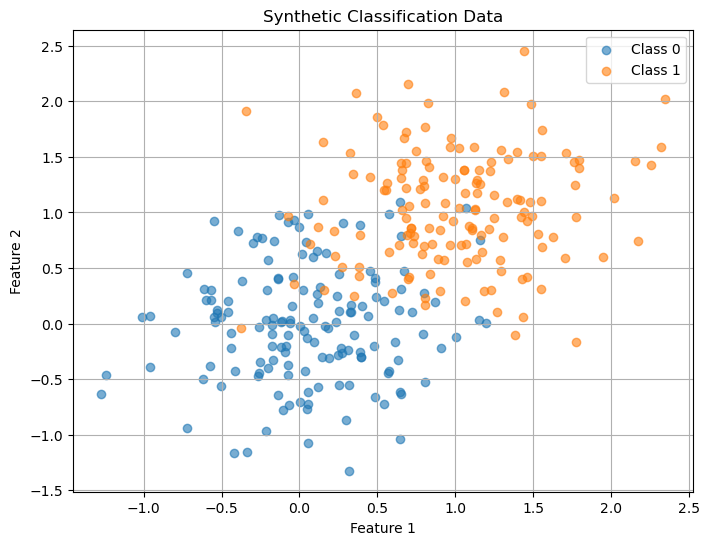

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", alpha=0.6,)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Classification Data")
plt.legend()
plt.grid(True)
plt.show()

In [208]:
svm = SVM(lam = 0.01, n_iters = 1000, mini_batch= 100)
y_ = torch.where(y < 0.5, -1, 1)
svm.fit(X, y_)
svm.w

tensor([ 0.1127,  0.0541,  0.0340,  0.0479,  0.0938,  0.0898,  0.1059,  0.0717,
         0.0953,  0.1060,  0.0604,  0.0901,  0.0639,  0.1090,  0.0931,  0.1482,
         0.0965, -0.0346,  0.0744,  0.0227,  0.0601,  0.0783,  0.1650,  0.1744,
         0.1409,  0.1900,  0.0545,  0.1140,  0.1801,  0.1268, -1.3293])

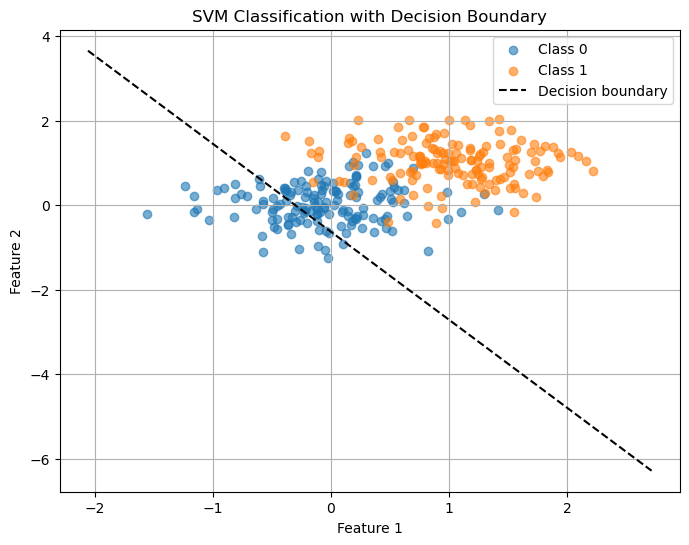

In [209]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", alpha=0.6)

# Decision boundary: w0*x + w1*y + w2 = 0  => y = -(w0*x + w2)/w1
w = svm.w
x_vals = torch.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
y_vals = -(w[0] * x_vals + w[2]) / w[1]

plt.plot(x_vals, y_vals, 'k--', label='Decision boundary')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM Classification with Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()

In [197]:
from sklearn.metrics import confusion_matrix
# (svm.predict(X) == y).float().mean()
# svm.predict(X) ==y
# y_ = torch.where(y < 0.5, -1, 1)
# scores = svm.score(X)
# (svm.predict(X) == y).float().mean()
y_pred = svm.predict(X)
# y_pred = y_pred.float()
# y_pred = torch.where(y_pred < 0.5, -1, 1)

confusion_matrix(y_pred, y, labels=[0, 1])


array([[110,   3],
       [ 40, 147]], dtype=int64)

In [185]:
x = torch.randint(1,10,(4,))
x 

tensor([6, 3, 7, 3])

In [198]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features
X = torch.tensor(X.values, dtype = torch.float32) 
y = predict_students_dropout_and_academic_success.data.targets 
y['num'] = (y['Target'] == "Graduate").astype(float)
y = torch.tensor(y['num'], dtype=torch.float32)


C:\Users\robsa\AppData\Local\Temp\ipykernel_23332\196649956.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['num'] = (y['Target'] == "Graduate").astype(float)


In [199]:
from sklearn.model_selection import train_test_split

# Custom split ratios
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

# First split: train and temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=(1 - train_ratio), random_state=42)

# Second split: validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=(test_ratio / (test_ratio + validation_ratio)), random_state=42)

In [200]:
y_train_ = torch.where(y_train < 0.5, -1, 1)

In [108]:
X.shape

torch.Size([4424, 36])

In [201]:
svm2 = SVM(lam = 0.0001, n_iters = 1000, mini_batch= 100)
svm2.fit(X_train, y_train_)



In [202]:
y_pred = svm2.predict(X_train)
confusion_matrix(y_train, y_pred)

array([[   0, 1301],
       [   0, 1353]], dtype=int64)

In [145]:
y_test_ = torch.where(y_test < 0.5, -1, 1)
y_val_ = torch.where(y_val < 0.5, -1, 1)
(svm2.predict(X_val) == y_val_ ).float().mean()
# yvalpred =svm2.predict(X_val).float()
# yvalpred = torch.where(yvalpred < 0.5, -1, 1)
# confusion_matrix(yvalpred, y_val_)

tensor(0.0124)

In [158]:
from sklearn.metrics import confusion_matrix
y_pred = svm2.predict(X_val).float()
y_pred = torch.where(y_pred < 0.5, -1, 1)
confusion_matrix(y_val_, y_pred)
# (y_val_ == y_pred).float().mean()
(y_val_ == y_pred).float().mean()

tensor(0.5299)